In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [3]:
data = pd.read_csv("Transformed_Housing_Data2.csv")

In [4]:
sale_price = data["Sale_Price"].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({ 'sale_price': sale_price,
                              'flat_area': flat_area})
sample_data.head()

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0


In [5]:
def param_init(Y):
    m = 0.1
    c = Y.mean()
    return m,c

In [6]:
def generate_pred(m,c,X):
    prediction = []
    for x in X:
        prediction.append(m * x + c)
    return prediction

In [7]:
def comput_cost(prediction,Y):
    cost = np.sum(((prediction-Y)**2)/len(Y))
    return cost

In [8]:
def gradients(prediction, Y, X):
  n = len(Y)
  gm = 2/n * np.sum((prediction - Y) * X)
  gc = 2/n * np.sum((prediction - Y))
  return gm, gc

In [9]:
def param_update(m_old , c_old , Gm_old, Gc_old, alpha):
  '''
  Update and return the new values of m and c
  '''
  m_new = m_old - alpha * Gm_old
  c_new = c_old - alpha * Gc_old
  return m_new, c_new

In [10]:
def result(m,c,X,Y,cost,predictions,i):
    if i < max_iter - 1:
        print("***Gradient Descent has converged at iteration {}***".format(i))
    else:
        print("***Result after",max_iter," iteration is =  ***")
    plt.figure(figsize=(15,6),dpi=120,)
    plt.scatter(X,Y,color='red',label='data points')
    label = 'final regression line at m={}, c={}'.format(m, c)
    plt.plot(X,predictions, color='green')
    plt.xlabel("Flat Area")
    plt.ylabel("Sale Price")
    plt.legend()



After Iteration 0 m =  0.11316346413633305 c =  1.1849780416165836e-16 Cost =  0.85836535863667
After Iteration 20 m =  0.3275595607435688 c =  1.240489192847842e-16 Cost =  0.6182472245590185
After Iteration 40 m =  0.4706921039517346 c =  1.3248661427193537e-16 Cost =  0.5112264752046607
After Iteration 60 m =  0.5662485308150865 c =  1.415904430738617e-16 Cost =  0.46352728398628984
After Iteration 80 m =  0.6300427631414932 c =  1.4951003398285442e-16 Cost =  0.4422677351921283
After Iteration 100 m =  0.6726323011945988 c =  1.611303683072644e-16 Cost =  0.4327923457067555
After Iteration 120 m =  0.7010654163122192 c =  1.666074685620818e-16 Cost =  0.42856916078553225
After Iteration 140 m =  0.7200475906265729 c =  1.6660746856208182e-16 Cost =  0.4266868855601835
After Iteration 160 m =  0.7327202415200801 c =  1.669405354694694e-16 Cost =  0.42584795473189874
After Iteration 180 m =  0.7411806042798547 c =  1.6694053546946945e-16 Cost =  0.42547404292284524
After Iteration 20

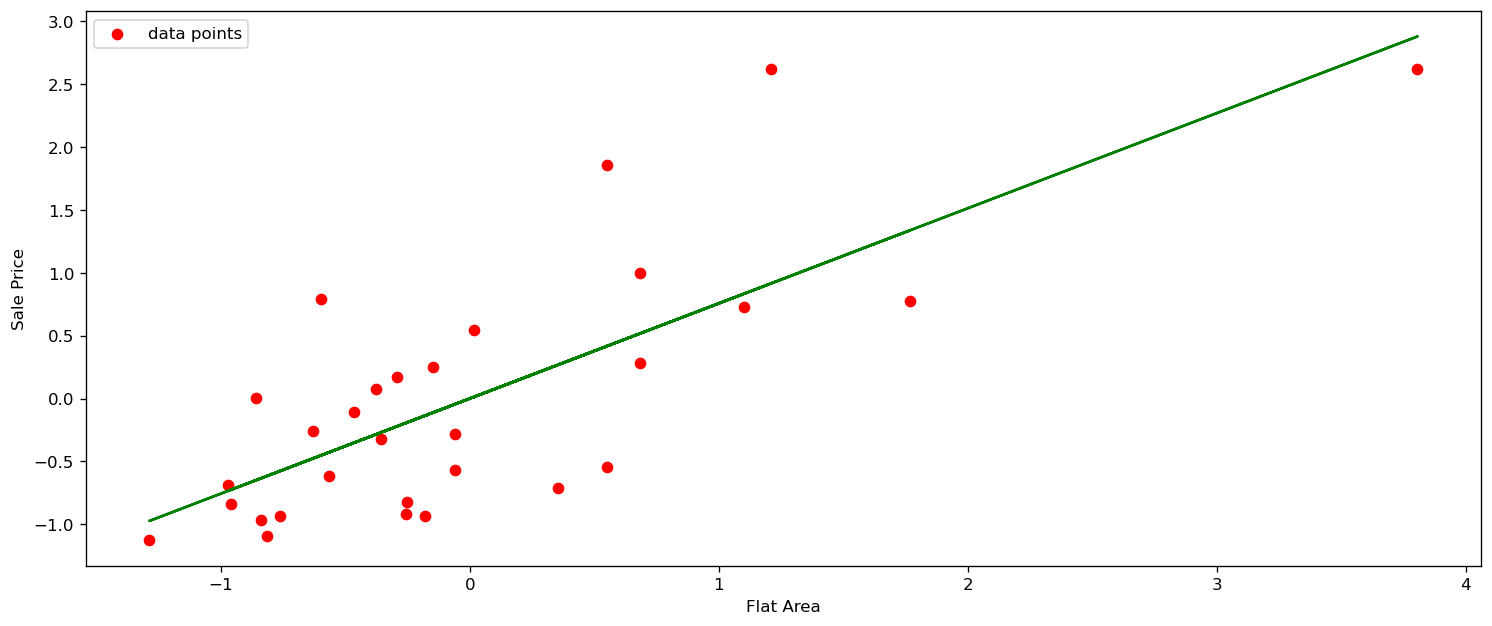

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))
max_iter=1000
cost_old=0
alpha=0.01
m,c = param_init(sale_price)
for i in range(0,max_iter):
    predictions = generate_pred(m,c,flat_area)
    cost_new = comput_cost(predictions,sale_price)
    if abs(cost_new - cost_old)<10**(-7):
        break
    gm,gc = gradients(predictions,sale_price,flat_area)
    m,c = param_update(m,c,gm,gc,alpha)
    if i%20==0:
        print("After Iteration", i, "m = ",m,"c = ",c,"Cost = ",cost_new)
    cost_old=cost_new
result(m , c, flat_area, sale_price,cost_new, predictions, i)


